Name: Nguyen Vu Anh Ngoc  
Class: DSEB63  
ID: 11214369

# Import

In [1]:
import dotenv
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

PATH = os.getenv("P")

# Functions

In [2]:
def transform(X):
    return np.hstack((np.ones((X.shape[0], 1)), X))

def linear_regression(X, y):
    X = transform(X)
    w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return w

def r2_score(y, y_pred):
    return 1 - np.sum((y - y_pred)**2) / np.sum((y - y.mean())**2)

def mse(y, y_pred):
    return np.sum((y - y_pred)**2) / y.shape[0]

def rmse(y, y_pred):
    return np.sqrt(mse(y, y_pred))

# data_linear

## Read data

In [3]:
data = pd.read_csv(PATH + '/data/data_linear.csv')
data

,Diện tích,Giá
0,30.0000,448.524
1,32.4138,509.248
2,34.8276,535.104
3,37.2414,551.432
4,39.6552,623.418
5,42.0690,625.992
6,44.4828,655.248
7,46.8966,701.377
8,49.3103,748.918
9,51.7241,757.881


## Implement

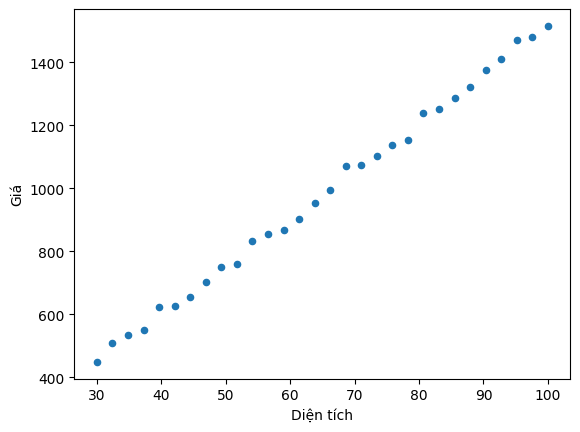

In [4]:
# Plot data
n, d = data.shape
X = data['Diện tích'].values.reshape((n, 1))
y = data['Giá'].values.reshape((n, 1))

data.plot.scatter(x='Diện tích', y='Giá')
plt.show()

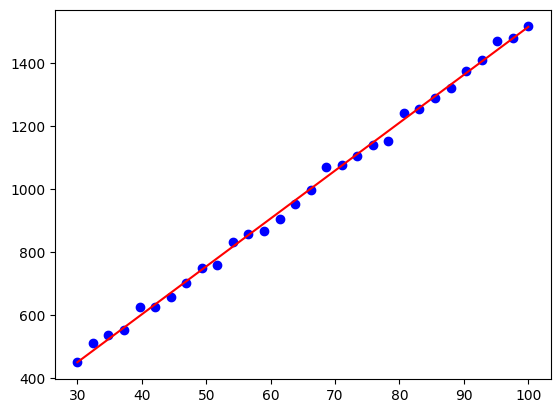

In [5]:
w = linear_regression(X, y)
y_pred = transform(X).dot(w)

# Draw the prediction line and scatter plot the original data
plt.plot(X, y_pred, color='red')
plt.scatter(X, y, color='blue')
plt.show()

In [6]:
# Evaluate the model
print('R2 score:', r2_score(y, y_pred))
print('MSE:', mse(y, y_pred))
print('RMSE:', rmse(y, y_pred))

R2 score: 0.9975640411137482
MSE: 246.6198784911247
RMSE: 15.704135712961879


In [7]:
# Predict the price of houses with an area of 50, 100, 150.
X_test = np.array([[50], [100], [150]])
y_test = transform(X_test).dot(w)

for i in range(len(X_test)):
    print('{:>6}  {:>10.3f}'.format(X_test[i][0],  y_test[i][0]))

    50     753.490
   100    1514.045
   150    2274.599


# boston_housing

## Read data

**Data Info**  
ZN: proportion of residential land zoned for lots over 25,000 sq.ft.  
INDUS: proportion of non-retail business acres per town  
CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)  
NOX: nitric oxides concentration (parts per 10 million)  
RM: average number of rooms per dwelling  
AGE: proportion of owner-occupied units built prior to 1940  
DIS: weighted distances to ﬁve Boston employment centers   
RAD: index of accessibility to radial highways  
TAX: full-value property-tax rate per $10,000  
PTRATIO: pupil-teacher ratio by town 12. B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 13. LSTAT: % lower status of the population  
MEDV: Median value of owner-occupied homes in $1000s  

In [8]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv(PATH + '/data/boston_housing.csv', delimiter=r'\s+', header=None, names=column_names)
data


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [9]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## Implement

In [11]:
n, d = data.shape
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values.reshape((n, 1))

In [12]:
w = linear_regression(X, y)
y_pred = transform(X).dot(w)

print('R2-score: {}'.format(r2_score(y, y_pred)))
print('MSE: {}'.format(mse(y, y_pred)))
print('RMSE: {}'.format(rmse(y, y_pred)))

R2-score: 0.7406426641094095
MSE: 21.894831181729202
RMSE: 4.679191295697281
